In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
import numpy as np
#import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
from langdetect import detect, DetectorFactory

In [2]:
#genius api
genius_api_key = 'gQVkGL-wnevLS3t39UOjl1a9x3smebFPcMX6awdjS-61kw-NrQEQmWWDbNXzUWjz'
genius_url = 'https://api.genius.com'

In [3]:
spotify_songs_csv = Path("Resources/spotify_most_streamed.csv")
spotify_songs_df = pd.read_csv(spotify_songs_csv)
spotify_songs_df.drop(columns=['released_month', 'released_day', 'in_spotify_playlists','in_spotify_charts',
                                'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
                                'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%','valence_%',
                                'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%','speechiness_%',
                                  'cover_url', 'artist_count'  ], inplace=True)
spotify_songs_df.head()

,track_name,artist(s)_name,released_year,streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703
1,LALA,Myke Towers,2023,133716286
2,vampire,Olivia Rodrigo,2023,140003974
3,Cruel Summer,Taylor Swift,2019,800840817
4,WHERE SHE GOES,Bad Bunny,2023,303236322


In [4]:
spotify_songs_df['Lyrics URL'] = ''
spotify_songs_df['Lyrics'] = ''
spotify_songs_df['Language'] = ''
spotify_songs_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703,,,
1,LALA,Myke Towers,2023,133716286,,,
2,vampire,Olivia Rodrigo,2023,140003974,,,
3,Cruel Summer,Taylor Swift,2019,800840817,,,
4,WHERE SHE GOES,Bad Bunny,2023,303236322,,,


In [5]:
top_100_df = spotify_songs_df.sort_values(by='streams', ascending=False).head(101)
top_100_df = top_100_df[top_100_df['streams'].str.isdigit()]
top_100_df

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,,,
625,Arcade,Duncan Laurence,2019,991336132,,,
253,Glimpse of Us,Joji,2022,988515741,,,
455,Seek & Destroy,SZA,2022,98709329,,,
98,Summertime Sadness,Lana Del Rey,2011,983637508,,,
...,...,...,...,...,...,...,...
528,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),"Julieta Venegas, Bad Bunny, Tainy",2021,775542072,,,
307,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2023,77377503,,,
631,Blessed-Cursed,ENHYPEN,2022,77337771,,,
105,Primera Cita,Carin Leon,2022,77309611,,,


In [6]:
def search_genius(row):
    base_url = "https://api.genius.com/search"
    token = "gQVkGL-wnevLS3t39UOjl1a9x3smebFPcMX6awdjS-61kw-NrQEQmWWDbNXzUWjz"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "q": f"{row['track_name']}{row['artist(s)_name']}"
    }
    try:
        response = requests.get(base_url, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()
        
        
        hits = data.get("response", {}).get("hits", [])
        if hits:
            return hits[0].get("result", {}).get("url", "No URL Found")
        else:
            return "No Results"
    except Exception as e:
        return f"Error: {e}"


top_100_df['Lyrics URL'] = top_100_df.apply(search_genius, axis=1)
top_100_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,https://genius.com/Taylor-swift-anti-hero-lyrics,,
625,Arcade,Duncan Laurence,2019,991336132,https://genius.com/Duncan-laurence-arcade-lyrics,,
253,Glimpse of Us,Joji,2022,988515741,https://genius.com/Joji-glimpse-of-us-lyrics,,
455,Seek & Destroy,SZA,2022,98709329,https://genius.com/Mc-eiht-all-day-everyday-ly...,,
98,Summertime Sadness,Lana Del Rey,2011,983637508,https://genius.com/Lana-del-rey-summertime-sad...,,


In [7]:
def scrape_lyrics(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        lyrics_container = soup.find('div', class_='Lyrics__Container-sc-1ynbvzw-1 kUgSbL')
        if lyrics_container:
            return lyrics_container.get_text(separator="\n").strip()
        return "Lyrics not found"
    except Exception as e:
        return f"Error: {e}"

top_100_df['Lyrics'] = top_100_df['Lyrics URL'].apply(scrape_lyrics)

In [8]:
top_100_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,https://genius.com/Taylor-swift-anti-hero-lyrics,[Verse 1]\nI have this thing where I get older...,
625,Arcade,Duncan Laurence,2019,991336132,https://genius.com/Duncan-laurence-arcade-lyrics,[Verse 1]\nA broken heart is all that's left\n...,
253,Glimpse of Us,Joji,2022,988515741,https://genius.com/Joji-glimpse-of-us-lyrics,[Verse 1]\nShe'd take the world off my shoulde...,
455,Seek & Destroy,SZA,2022,98709329,https://genius.com/Mc-eiht-all-day-everyday-ly...,Geah\nCompton\nFor the millenium\nHalf Ounce (...,
98,Summertime Sadness,Lana Del Rey,2011,983637508,https://genius.com/Lana-del-rey-summertime-sad...,[Chorus]\nKiss me hard before you go\nSummerti...,


In [9]:
DetectorFactory.seed = 0

def detect_language(lyrics):
    try:
        return detect(lyrics)
    except Exception as e:
        return f"Error: {e}"

top_100_df['Language'] = top_100_df['Lyrics'].apply(detect_language)
top_100_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,https://genius.com/Taylor-swift-anti-hero-lyrics,[Verse 1]\nI have this thing where I get older...,en
625,Arcade,Duncan Laurence,2019,991336132,https://genius.com/Duncan-laurence-arcade-lyrics,[Verse 1]\nA broken heart is all that's left\n...,en
253,Glimpse of Us,Joji,2022,988515741,https://genius.com/Joji-glimpse-of-us-lyrics,[Verse 1]\nShe'd take the world off my shoulde...,en
455,Seek & Destroy,SZA,2022,98709329,https://genius.com/Mc-eiht-all-day-everyday-ly...,Geah\nCompton\nFor the millenium\nHalf Ounce (...,en
98,Summertime Sadness,Lana Del Rey,2011,983637508,https://genius.com/Lana-del-rey-summertime-sad...,[Chorus]\nKiss me hard before you go\nSummerti...,en


In [10]:
unique_language = top_100_df['Language'].unique()
print(unique_language)

['en' 'es' 'id' 'ko']


In [11]:
language_count = top_100_df['Language'].value_counts()
print(language_count)

Language
en    89
es     9
id     1
ko     1
Name: count, dtype: int64


In [12]:
language_pie = ['English', 'Spanish', 'Indonesian', 'Korean']
language_appearance_pie = [89, 9, 1, 1]
#explode = (0.1,0,0,0)

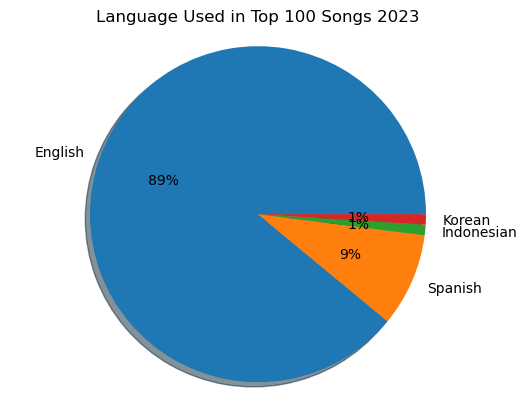

In [13]:
plt.pie(language_appearance_pie, labels=language_pie, autopct="%1.0f%%", shadow=True, startangle=0);
plt.axis("equal");
plt.title('Language Used in Top 100 Songs 2023');
plt.savefig("Images/Language Used in Top 100 Songs 2023.png")


In [14]:
most_streams_per_language = top_100_df.groupby('Language')['streams'].max()
print(most_streams_per_language)


Language
en    999748277
es     95053634
id     91221625
ko     79095270
Name: streams, dtype: object


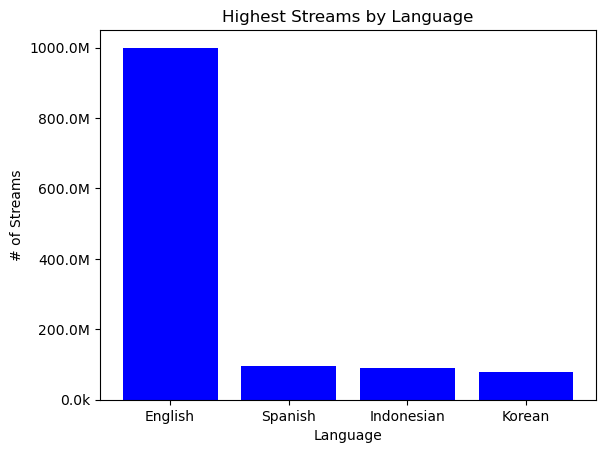

In [15]:
language_bar = ['English', 'Spanish', 'Indonesian', 'Korean']
bar_streams = [999748277, 95053634, 91221625, 79095270]

plt.bar(language_bar, bar_streams, color="b", align="center")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}k'.format(x * 1e-3) if x < 1e6 else '{:.1f}M'.format(x * 1e-6)))
plt.title('Highest Streams by Language')
plt.xlabel('Language')
plt.ylabel('# of Streams')
plt.savefig("Images/Highest Stream by Language.png")


In [16]:
spotify_songs_df = spotify_songs_df[spotify_songs_df['streams'].str.isdigit()]


spotify_streams_only = spotify_songs_df['streams']
spotify_streams_only = spotify_streams_only.astype(float)
print(spotify_streams_only.mean())
print(spotify_streams_only.median())

print(st.normaltest(spotify_streams_only.sample(100)))



514137424.93907565
290530915.0
NormaltestResult(statistic=59.90209664259059, pvalue=9.827091207179074e-14)
